In [1]:
import os
import sys
import random
import math
import re
import time
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Root directory of the project
ROOT_DIR = os.path.abspath("../../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "07012021/mask_rcnn_coco_0159.h5")

Using TensorFlow backend.


In [2]:
#data import
import coco
config = coco.CocoConfig()
COCO_DIR = "/home/srini/hbrs/Fourthsem/CV/Project/initial_dataset/coco" 

In [3]:
class InferenceConfig(config.__class__):
    # Run detection on one image at a time
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()

In [4]:
#preferences
DEVICE = "/cpu:0"
def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

In [5]:
#load and prepare dataset
dataset = coco.CocoDataset()
dataset.load_coco(COCO_DIR, "val")

# Must call before using the dataset
dataset.prepare()

print("Images: {}\nClasses: {}".format(len(dataset.image_ids), dataset.class_names))

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Images: 32
Classes: ['BG', 'BottleCap_Deformed', 'BottleCap_FaceDown', 'BottleCap_FaceUp']


In [6]:
# Create model in inference mode
with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR,
                              config=config)
weights_path = COCO_MODEL_PATH

model.load_weights(weights_path, by_name=True)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.
[<keras.engine.input_layer.InputLayer object at 0x7f152507b198>, <keras.layers.convolutional.ZeroPadding2D object at 0x7f152507b390>, <keras.layers.convolutional.Conv2D object at 0x7f152507b6a0>, <mrcnn.model.BatchNorm object at 0x7f152507bda0>, <keras.layers.core.Activation object at 0x7f152509f208>, <keras.layers.pooling.MaxPooling2D object at 0x7f15248359e8>, <keras.layers.convolutional.Conv2D object at 0x7f152484ac50>, <mrcnn.model.BatchNorm object at 0x7f1524853c50>, <keras.layers.core.Activation object at 0x7f1524853f60>, <keras.layers.convolutional.Conv2D object at 0x7f1524853fd0>, <mrcnn.model.BatchNorm object at 0x7f15247ef668>, <keras.layers.core.Activation object at 0x7f15247f4

2

Number of Bottle caps detected as Deformed are 1
Number of Bottle caps detected as Faceup are 2
Number of Bottle caps detected as Facedown are 4


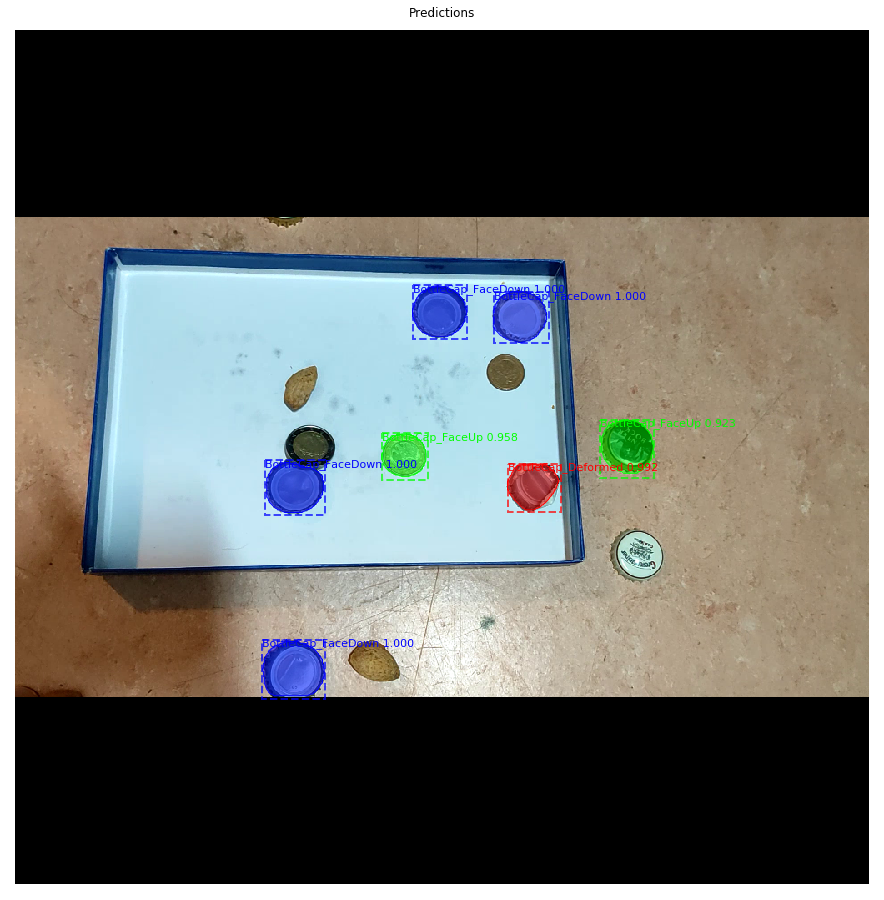

In [7]:
#detection
image_id = random.choice(dataset.image_ids)
print(image_id)
image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)

info = dataset.image_info[image_id]
info['file_path'] = "/home/srini/hbrs/Fourthsem/CV/Project/"
# Run object detection
results = model.detect([image], verbose=0)

# Display results
ax = get_ax(1)
r = results[0]
visualize.display_instances(info, image, r['rois'], r['masks'], r['class_ids'], 
                            dataset.class_names, r['scores'], ax=ax,
                            title="Predictions")

In [9]:
import keras
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

In [12]:
img = load_img('/home/srini/hbrs/Fourthsem/CV/Project/initial_dataset/images (copy)/CV20_image_105.png')
img = img_to_array(img)

Number of Bottle caps detected as Deformed are 0
Number of Bottle caps detected as Faceup are 2
Number of Bottle caps detected as Facedown are 4


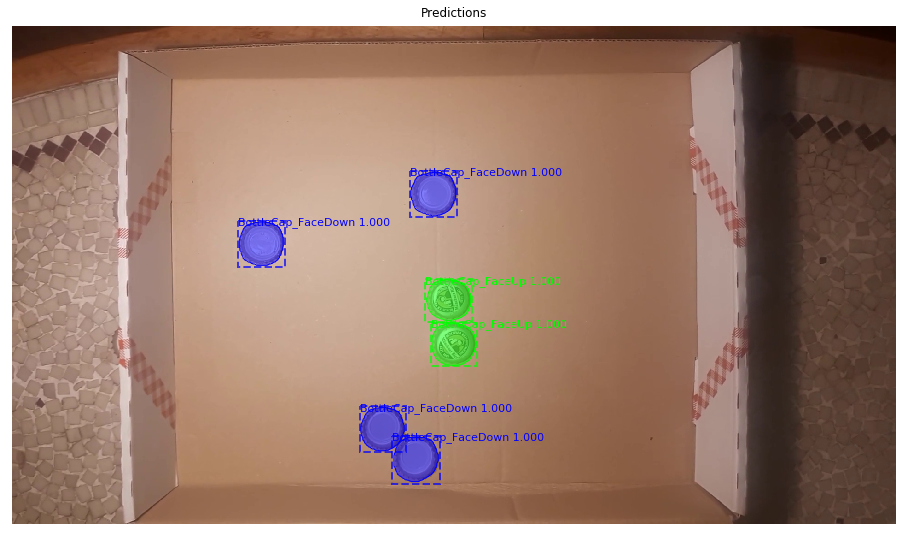

In [13]:
info = {'source': 'test', 'id':1}
info['file_path'] = "/home/srini/hbrs/Fourthsem/CV/Project/"
# Run object detection
results = model.detect([img], verbose=0)

# Display results
ax = get_ax(1)
r = results[0]
visualize.display_instances(info, img, r['rois'], r['masks'], r['class_ids'], 
                            dataset.class_names, r['scores'], ax=ax,
                            title="Predictions")